In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('C:\\Users\\Sunny\\Desktop\\Merkle Sokrati\\Assignment1.xlsx')
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [3]:
df.isnull().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [4]:
df.shape

(16834, 16)

In [5]:
df.link_clicks.fillna(df.link_clicks.mode()[0], inplace=True)

In [6]:
df.isnull().sum()

Date                    0
product                 0
phase                   0
campaign_platform       0
campaign_type           0
communication_medium    0
subchannel              0
audience_type           0
creative_type           0
creative_name           0
device                  0
age                     0
spends                  0
impressions             0
clicks                  0
link_clicks             0
dtype: int64

In [7]:
df.audience_type.value_counts()

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64

In [8]:
df.creative_type.value_counts()

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

In [9]:
df.creative_name.value_counts()

'-          15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64

In [10]:
df.drop(['audience_type', 'creative_type', 'creative_name'],axis=1,inplace=True)

In [11]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,18-24,53.31,10,2,0.0


In [12]:
df.age.value_counts()

25-34           3097
35-44           2865
Undetermined    2586
45-54           2499
18-24           2472
55-64           1757
65 or more      1558
Name: age, dtype: int64

In [13]:
def convert_age_to_average(x):
    para = x.split('-')
    if len(para) == 2:
        return(float(para[0])+float(para[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df['average_age'] = df.age.apply(convert_age_to_average)

In [15]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,device,age,spends,impressions,clicks,link_clicks,average_age
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,18-24,0.00,2,0,0.0,21.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,25-34,0.00,5,0,0.0,29.5
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,35-44,0.00,1,0,0.0,39.5
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,Undetermined,14.63,5,3,0.0,NaN
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,18-24,53.31,10,2,0.0,21.0


In [16]:
df.drop('age',axis=1, inplace=True)

In [17]:
df.average_age.fillna(df.average_age.mode()[0],inplace=True)

In [18]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,device,spends,impressions,clicks,link_clicks,average_age
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,2,0,0.0,21.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,5,0,0.0,29.5
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,1,0,0.0,39.5
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,14.63,5,3,0.0,29.5
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,53.31,10,2,0.0,21.0


In [19]:
df.describe()

,spends,impressions,clicks,link_clicks,average_age
count,16834.000000,16834.000000,16834.000000,16834.000000,16834.000000
mean,148.694236,287.959190,11.977783,2.099976,36.053879
std,483.895724,2444.450313,44.796963,18.358048,11.747268
min,0.000000,0.000000,0.000000,0.000000,21.000000
25%,0.180000,3.000000,0.000000,0.000000,29.500000
50%,22.535000,13.000000,2.000000,0.000000,29.500000
75%,110.020000,64.000000,8.000000,0.000000,49.500000
max,9221.960000,67454.000000,1075.000000,450.000000,59.500000


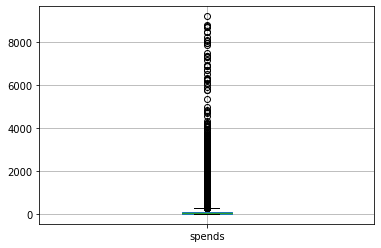

In [20]:
df.boxplot('spends')

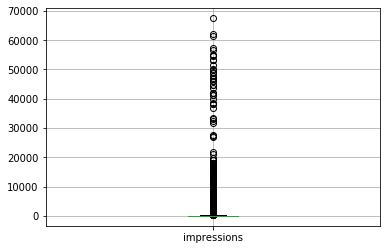

In [21]:
df.boxplot('impressions')

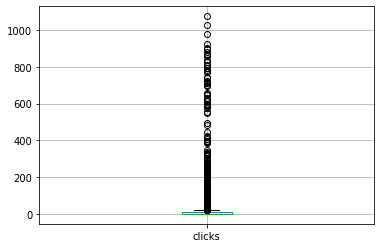

In [22]:
df.boxplot('clicks')

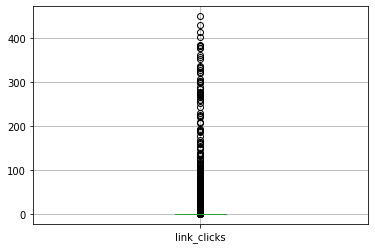

In [23]:
df.boxplot('link_clicks')

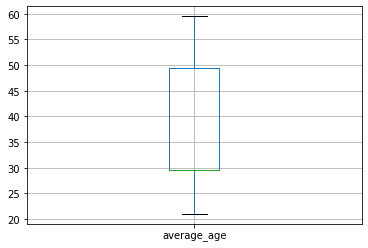

In [24]:
df.boxplot('average_age')

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

spends         109.84
impressions     61.00
clicks           8.00
link_clicks      0.00
average_age     20.00
dtype: float64

In [26]:
df.drop('Date', axis=1, inplace=True)

In [27]:
df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
df2.head()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,device,spends,impressions,clicks,link_clicks,average_age
0,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,2,0,0.0,21.0
1,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,5,0,0.0,29.5
2,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,1,0,0.0,39.5
3,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,14.63,5,3,0.0,29.5
4,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,53.31,10,2,0.0,21.0


In [29]:
df2.shape

(13137, 12)

In [30]:
df2.describe()

,spends,impressions,clicks,link_clicks,average_age
count,13137.000000,13137.000000,13137.000000,13137.0,13137.000000
mean,35.833977,17.726422,2.681662,0.0,37.059679
std,54.371308,25.574461,3.742214,0.0,12.357683
min,0.000000,0.000000,0.000000,0.0,21.000000
25%,0.000000,2.000000,0.000000,0.0,29.500000
50%,10.440000,7.000000,1.000000,0.0,29.500000
75%,49.590000,21.000000,4.000000,0.0,49.500000
max,274.380000,155.000000,20.000000,0.0,59.500000


In [34]:
df2.dtypes

product                  object
phase                    object
campaign_platform        object
campaign_type            object
communication_medium     object
subchannel               object
device                   object
spends                  float64
impressions               int64
clicks                    int64
link_clicks             float64
average_age             float64
dtype: object